In [1]:
import os,sys
import numpy as np
import xarray as xr
import zarr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

# plota
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerTuple
CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}

# from dask.distributed import Client
import multiprocessing.popen_spawn_posix
from distributed import Client

c = Client()
c

/opt/jaspy/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35111 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35111/status,
Dashboard: http://127.0.0.1:35111/status,Workers: 4
Total threads: 12,Total memory: 24.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44415,Workers: 0
Dashboard: http://127.0.0.1:35111/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:44955,Total threads: 3
Dashboard: http://127.0.0.1:42241/status,Memory: 6.00 GiB
Nanny: tcp://127.0.0.1:41825,


In [2]:
dir_work = '/gws/nopw/j04/isotipic/stajouri/PhD/Jean_Zay_DIRWORK/uor98hu/'

diro = '/home/users/stajouri/Documents/PLOTS/PhD/'

dir_data = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"
my_regions_masks = xr.open_zarr(dir_data+"my_regions_masks.zarr")

# load data and define functions to plot figures

In [3]:
 # construct list for the bar chart
def list_var(nexp,var_name, mask):
    dir_base = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"
    var_SLA = xr.open_zarr(dir_base+nexp+"/SLA/var_terms_box_"+mask+".zarr")
    var_ste = xr.open_zarr(dir_base+nexp+"/"+"STERIC"+"/var_terms_box_"+mask+"_0_bottom.zarr")
    var_the = xr.open_zarr(dir_base+nexp+"/"+"THERMO"+"/var_terms_box_"+mask+"_0_bottom.zarr")
    var_hal = xr.open_zarr(dir_base+nexp+"/"+"HALO"+"/var_terms_box_"+mask+"_0_bottom.zarr")
    var_man = xr.open_zarr(dir_base+nexp+"/"+"MANO"+"/var_terms_box_"+mask+".zarr")
    return [var_SLA.variances.sel(var_term=var_name).values,\
           var_ste.variances.sel(var_term=var_name).values,\
           var_the.variances.sel(var_term=var_name).values,\
           var_hal.variances.sel(var_term=var_name).values,\
           var_man.variances.sel(var_term=var_name).values]

In [4]:
# to get the values
mask='atl'
list_tot_var1 = list_var("ES",'tot_var',mask)
list_forced_var1 = list_var("ES",'forced_var',mask)
list_intrinsic_var1 = list_var("ES",'intrinsic_var',mask)
list_res_var1 = list_var("ES",'res_var',mask)

list_tot_var2 = list_var("EAI",'tot_var',mask)
list_forced_var2 = list_var("EAI",'forced_var',mask)
list_intrinsic_var2 = list_var("EAI",'intrinsic_var',mask)
list_res_var2 = list_var("EAI",'res_var',mask)

In [5]:
def plot_bar_chart(ax, mask):

    list_tot_var1 = list_var("ES",'tot_var',mask)
    list_forced_var1 = list_var("ES",'forced_var',mask)
    list_intrinsic_var1 = list_var("ES",'intrinsic_var',mask)
    list_res_var1 = list_var("ES",'res_var',mask)
    
    list_tot_var2 = list_var("EAI",'tot_var',mask)
    list_forced_var2 = list_var("EAI",'forced_var',mask)
    list_intrinsic_var2 = list_var("EAI",'intrinsic_var',mask)
    list_res_var2 = list_var("EAI",'res_var',mask)

    # set width of bar 
    barWidth = 0.10
    
    # Set position of bar on X axis 
    # PLOT BAR OF --------------------------- ES
    # Set position of bar on X axis 
    br1 = np.arange(len(list_tot_var1)) 
    br2 = [x + 2*barWidth for x in br1] 
    br3 = [x + 2*barWidth for x in br2] 
    br4 = [x + 2*barWidth for x in br3] 
                                                 
    # Make the plot
    b1 = ax.bar(br1, list_tot_var1, color ="k", width = barWidth, edgecolor ='grey', label ='Total') 
    b2 = ax.bar(br2, list_forced_var1, color =CB_colors['blue'], width = barWidth, edgecolor ='grey', label ='Forced') 
    b3 = ax.bar(br3, list_intrinsic_var1, color ='darkgoldenrod', width = barWidth, edgecolor ='grey', label ='Intrinsic') 
    b4 = ax.bar(br4, list_res_var1, color ='gold', width = barWidth, edgecolor ='grey', label ='Bias') 


    # PLOT BAR OF --------------------------- EAI
    # Set position of bar on X axis 
    br1 = np.arange(len(list_tot_var2)) + barWidth
    br2 = [x + 2*barWidth for x in br1] 
    br3 = [x + 2*barWidth for x in br2] 
    br4 = [x + 2*barWidth for x in br3] 
    
    # Make the plot
    b1_bis = ax.bar(br1, list_tot_var2,     color ="k", width = barWidth, alpha=0.7,edgecolor ='grey') 
    b2_bis = ax.bar(br2, list_forced_var2, color =CB_colors['blue'], width = barWidth,alpha=0.5,edgecolor ='grey') 
    b3_bis = ax.bar(br3, list_intrinsic_var2, color ='darkgoldenrod', width = barWidth, alpha=0.5,edgecolor ='grey') 
    b4_bis = ax.bar(br4, list_res_var2,      color ='gold', width = barWidth, alpha=0.5,edgecolor ='grey') 


    ax.set_xticks([r + barWidth for r in range(len(list_tot_var1))]) 
    ax.set_xticklabels(['SLA', 'Steric', 'Thermosteric', 'Halosteric', 'Manometric'],fontsize=7) #, fontsize=12) ,rotation=45, rotation_mode="anchor"

    # plt.ylabel(r"Variance [$cm^{2}$]")
    # plt.xticks([r + barWidth for r in range(len(list_tot_var1))], ['SLA', 'Steric', 'Thermosteric', 'Halosteric']) 

    # l = ax.legend([(b1, b1_bis),(b2, b2_bis),(b3, b3_bis),(b4, b4_bis)], ['Total ES|ER', 'Forced ES|ER', 'Intrinsic ES|ER', 'Bias ES|ER'],\
    #            handler_map={tuple: HandlerTuple(ndivide=None)})


## for the panels over depths

In [6]:
def list_var_dep(nexp,COMP,var_name, mask):
    dir_base = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"
    return_list=[]
    
    for dep in ["50m", "100m", "300m", "700m", "2000m", "bottom"]: 
        var_ES_dep = xr.open_zarr(dir_base+nexp+"/"+COMP+"/var_terms_box_"+mask+"_0_"+dep+".zarr").variances
        return_list.append(var_ES_dep.sel(var_term=var_name).values)

    return return_list

In [7]:
# example of a bar chart
def plot_bar_chart_dep(COMP,ax,mask):
    # set width of bar
    barWidth = 0.10
    
    # PLOT BAR OF --------------------------- ES
    # set height of bar 
    list_tot_var1 = list_var_dep('ES',COMP,'tot_var',mask)
    list_forced_var1 = list_var_dep('ES',COMP,'forced_var',mask)
    list_intrinsic_var1 = list_var_dep('ES',COMP,'intrinsic_var',mask)
    list_res_var1 = list_var_dep('ES',COMP,'res_var',mask)

    # Set position of bar on X axis 
    br1 = np.arange(len(list_tot_var1)) 
    br2 = [x + 2*barWidth for x in br1] 
    br3 = [x + 2*barWidth for x in br2] 
    br4 = [x + 2*barWidth for x in br3] 
                                                 
    # Make the plot
    b1 = ax.bar(br1, list_tot_var1, color ="k", width = barWidth, edgecolor ='grey', label ='Total') 
    b2 = ax.bar(br2, list_forced_var1, color =CB_colors['blue'], width = barWidth, edgecolor ='grey', label ='Forced') 
    b3 = ax.bar(br3, list_intrinsic_var1, color ='darkgoldenrod', width = barWidth, edgecolor ='grey', label ='Intrinsic') 
    b4 = ax.bar(br4, list_res_var1, color ='gold', width = barWidth, edgecolor ='grey', label ='Bias') 
    
    # PLOT BAR OF --------------------------- EAI
    # set height of bar 
    list_tot_var2 = list_var_dep('EAI',COMP,'tot_var',mask)
    list_forced_var2 = list_var_dep('EAI',COMP,'forced_var',mask)
    list_intrinsic_var2 = list_var_dep('EAI',COMP,'intrinsic_var',mask)
    list_res_var2 = list_var_dep('EAI',COMP,'res_var',mask)
    
    # Set position of bar on X axis 
    br1 = np.arange(len(list_tot_var2)) + barWidth
    br2 = [x + 2*barWidth for x in br1] 
    br3 = [x + 2*barWidth for x in br2] 
    br4 = [x + 2*barWidth for x in br3] 
    
    # Make the plot
    b1_bis = ax.bar(br1, list_tot_var2,     color ="k", width = barWidth, alpha=0.7,edgecolor ='grey') 
    b2_bis = ax.bar(br2, list_forced_var2, color =CB_colors['blue'], width = barWidth,alpha=0.5,edgecolor ='grey') 
    b3_bis = ax.bar(br3, list_intrinsic_var2, color ='darkgoldenrod', width = barWidth, alpha=0.5,edgecolor ='grey') 
    b4_bis = ax.bar(br4, list_res_var2,      color ='gold', width = barWidth, alpha=0.5,edgecolor ='grey') 


    ax.set_xticks([r + barWidth for r in range(len(list_tot_var1))]) 
    ax.set_xticklabels(['0-50m', '0-100m','0-300m','0-700m','0-2000m','0-bottom'],fontsize=7) #, ) ,rotation=45, rotation_mode="anchor"

    
    return [(b1, b1_bis),(b2, b2_bis),(b3, b3_bis),(b4, b4_bis)]

# PLOT FIGURE

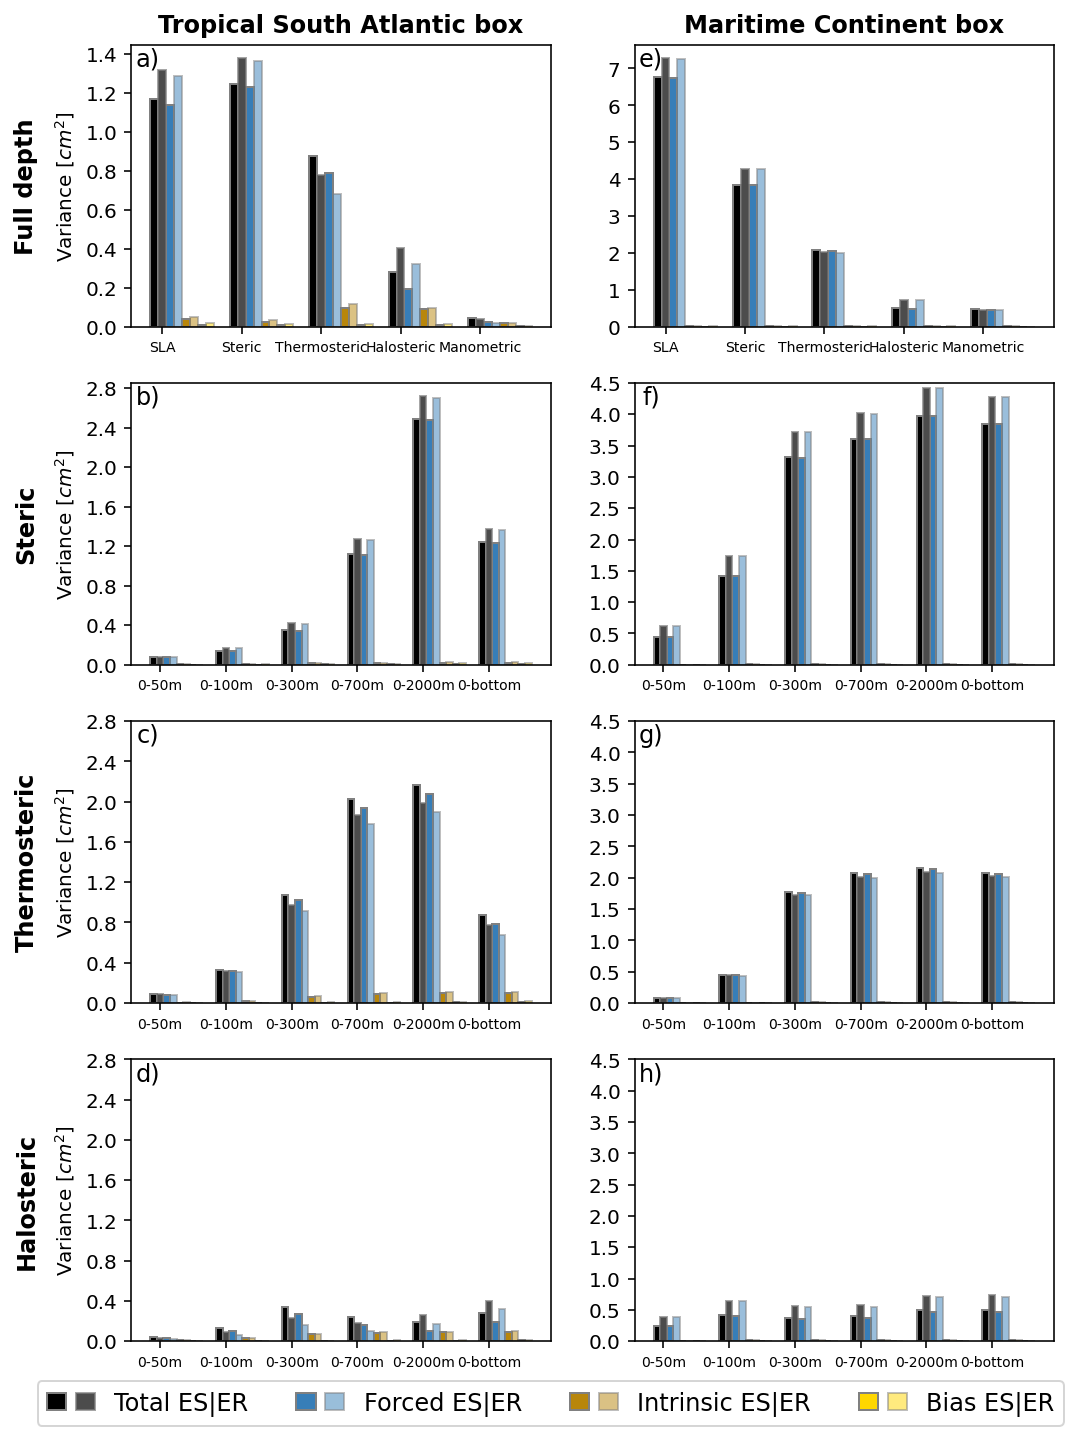

In [33]:
cm = 1/2.54  # centimeters in inches

fig, [(ax0,ax1),(ax2,ax3), (ax4,ax5),(ax6,ax7)] = plt.subplots(4,2,figsize=(21*cm, 29.7*cm), facecolor='none', dpi=72*2) # 
# plt.subplots_adjust( hspace=0.45) #wspace=0.1,

# first column :
ax0.set_title('Tropical South Atlantic box', fontsize=12, weight='bold')

plot_bar_chart(ax0,'atl'); ax0.set_yticks(np.arange(0,1.6,0.2)) 
plot_bar_chart_dep("STERIC",ax2,'atl'); ax2.set_yticks(np.arange(0,3.0,0.4)) 
plot_bar_chart_dep("THERMO",ax4,'atl'); ax4.set_yticks(np.arange(0,3.0,0.4)) 
plot_bar_chart_dep("HALO",ax6,'atl');   ax6.set_yticks(np.arange(0,3.0,0.4)) #np.arange(0,0.5,0.1)) 

ax0.set_ylabel(r'Variance [$cm^{2}$]')
ax2.set_ylabel(r'Variance [$cm^{2}$]')
ax4.set_ylabel(r'Variance [$cm^{2}$]')
ax6.set_ylabel(r'Variance [$cm^{2}$]')

# naming panels
ax0.text(-0.25, 0.5, "Full depth", rotation=90,weight='bold',  fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
ax2.text(-0.25, 0.5, "Steric",rotation=90,weight='bold', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax4.text(-0.25, 0.5, "Thermosteric",rotation=90,weight='bold', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax6.text(-0.25, 0.5, "Halosteric", rotation=90,weight='bold',fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)

# second column :

ax1.set_title('Maritime Continent box', fontsize=12, weight='bold')
plot_bar_chart(ax1,'sea'); ax1.set_yticks(np.arange(0,8,1))
plot_bar_chart_dep("STERIC",ax3,'sea'); ax3.set_yticks(np.arange(0,5.0,.5)) 
plot_bar_chart_dep("THERMO",ax5,'sea'); ax5.set_yticks(np.arange(0,5.0,.5)) 
legend_handles = plot_bar_chart_dep("HALO",ax7,'sea');  ax7.set_yticks(np.arange(0,5.0,.5))  
ax3.set_ylim(0,4.5)
ax5.set_ylim(0,4.5)
ax7.set_ylim(0,4.5)

l = ax6.legend(legend_handles, ['Total ES|ER', 'Forced ES|ER', 'Intrinsic ES|ER', 'Bias ES|ER'],\
               handler_map={tuple: HandlerTuple(ndivide=None)},loc='upper center',ncol=4, \
               bbox_to_anchor=(1., -0.1), fancybox=True, fontsize = 12)


ax0.text(0.04, 0.95, 'a)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
ax1.text(0.038, 0.95, 'e)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.04, 0.95, 'b)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax3.text(0.04, 0.95, 'f)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax4.text(0.04, 0.95, 'c)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax5.text(0.04, 0.95, 'g)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax6.text(0.04, 0.95, 'd)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax7.text(0.04, 0.95, 'h)', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)


namo="figure8_bar_plot.png"

# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight', transparent=True, pad_inches=0) #,edgecolor='none', bbox_inches='tight'
# plt.close(fig) 


In [34]:
diro+namo

'/home/users/stajouri/Documents/PLOTS/PhD/figure8_bar_plot.png'

In [35]:
namo

'figure8_bar_plot.png'